In [5]:
import pandas as pd
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.core import Lambda
from keras.utils import np_utils
from keras.preprocessing import image
from keras.optimizers import Adam
from keras import backend as K
from keras.applications import VGG16
from matplotlib import pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
%matplotlib inline

log_path = './data'
column_names = ['center', 'left', 'right','steering', 'throttle', 'brake', 'speed']
data_df = pd.read_csv('driving_log.csv',names=column_names)

data_df.iloc[:100]

Using TensorFlow backend.
c:\users\engineer_at_work\documents\virtual_environment\udacity\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


,center,left,right,steering,throttle,brake,speed
0,C:\Users\Engineer_At_Work\CarND-Behavioral-Clo...,C:\Users\Engineer_At_Work\CarND-Behavioral-Clo...,C:\Users\Engineer_At_Work\CarND-Behavioral-Clo...,0.000000,0.0,0,4.190000e-06
1,C:\Users\Engineer_At_Work\CarND-Behavioral-Clo...,C:\Users\Engineer_At_Work\CarND-Behavioral-Clo...,C:\Users\Engineer_At_Work\CarND-Behavioral-Clo...,0.000000,0.0,0,1.850000e-06
2,C:\Users\Engineer_At_Work\CarND-Behavioral-Clo...,C:\Users\Engineer_At_Work\CarND-Behavioral-Clo...,C:\Users\Engineer_At_Work\CarND-Behavioral-Clo...,0.000000,0.0,0,1.350000e-06
3,C:\Users\Engineer_At_Work\CarND-Behavioral-Clo...,C:\Users\Engineer_At_Work\CarND-Behavioral-Clo...,C:\Users\Engineer_At_Work\CarND-Behavioral-Clo...,0.000000,0.0,0,2.080000e-06
4,C:\Users\Engineer_At_Work\CarND-Behavioral-Clo...,C:\Users\Engineer_At_Work\CarND-Behavioral-Clo...,C:\Users\Engineer_At_Work\CarND-Behavioral-Clo...,0.000000,0.0,0,2.500000e-06
5,C:\Users\Engineer_At_Work\CarND-Behavioral-Clo...,C:\Users\Engineer_At_Work\CarND-Behavioral-Clo...,C:\Users\Engineer_At_Work\CarND-Behavioral-Clo...,0.000000,0.0,0,6.510000e-06
6,C:\Users\Engineer_At_Work\CarND-Behavioral-Clo...,C:\Users\Engineer_At_Work\CarND-Behavioral-Clo...,C:\Users\Engineer_At_Work\CarND-Behavioral-Clo...,0.000000,0.0,0,7.790000e-06
7,C:\Users\Engineer_At_Work\CarND-Behavioral-Clo...,C:\Users\Engineer_At_Work\CarND-Behavioral-Clo...,C:\Users\Engineer_At_Work\CarND-Behavioral-Clo...,0.000000,0.0,0,3.520000e-06
8,C:\Users\Engineer_At_Work\CarND-Behavioral-Clo...,C:\Users\Engineer_At_Work\CarND-Behavioral-Clo...,C:\Users\Engineer_At_Work\CarND-Behavioral-Clo...,0.000000,0.0,0,5.070000e-06
9,C:\Users\Engineer_At_Work\CarND-Behavioral-Clo...,C:\Users\Engineer_At_Work\CarND-Behavioral-Clo...,C:\Users\Engineer_At_Work\CarND-Behavioral-Clo...,0.000000,0.0,0,1.420000e-05


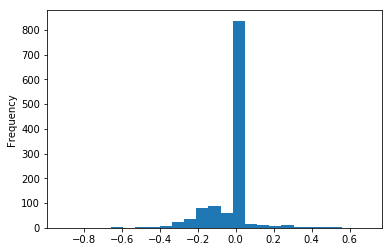

In [6]:
data_df['steering'].plot.hist(bins=25)

In [3]:
data_df['steering'].describe()

count    1196.000000
mean       -0.030852
std         0.113788
min        -0.913878
25%        -0.027925
50%         0.000000
75%         0.000000
max         0.689905
Name: steering, dtype: float64

In [7]:
noturn= data_df[data_df['steering']== 0.0].iloc[0]
rightturn= data_df[(data_df['steering'] >= 0.6) & (data_df['steering'] <= 1.0)].iloc[0]
leftturn= data_df[(data_df['steering'] >= -1) & (data_df['steering']<= 0.6)].iloc[0]

In [10]:
def plot_images_from_row(row, image_preprocess=lambda x: x):
    f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10, 5))
    image = plt.imread(row['left'].strip())
    ax1.imshow(image_preprocess(image))
    ax1.grid(False)
    
    image = plt.imread(row['center'])
    ax2.imshow(image_preprocess(image))
    ax2.grid(False)
    image = plt.imread(row['right'].strip())
    ax3.imshow(image_preprocess(image))
    ax3.grid(False)

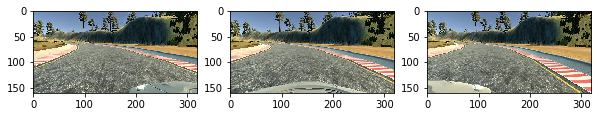

In [11]:
plot_images_from_row(noturn)


In [5]:

def crop(image):
    return image[60 : 135]
    
def convert2hsv(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

def convert2yuv(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2YUV)

def convert2hls(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2HLS)



In [6]:
from tqdm import tqdm
import cv2
def brightness(image):
    factor= np.random.uniform(0.4,1.2)
    hsv= convert2hsv(image)
    hsv[:,:,2]= hsv[:,:,2] * factor
    bright= cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    return bright

def resize(image):
    return cv2.resize(crop(image),(224,49), interpolation= cv2.INTER_AREA)

def load_image(src, resize=resize):
    image = plt.imread(src)
    return resize(image)



In [7]:
images =[]

for img_src in tqdm(data_df['center']):
    images.append(load_image(img_src.strip()))

for img_src in tqdm(data_df['left']):
    images.append(load_image(img_src.strip()))

for img_src in tqdm(data_df['right']):
    images.append(load_image(img_src.strip()))
    

100%|█████████████████████████████████████████████████████████████████████████████| 1196/1196 [00:01<00:00, 703.49it/s]


In [8]:
import numpy as np
images= np.asarray(images)
brightness_augmented = np.asarray([brightness(image) for image in images])
print(brightness, "   ")
images = np.append(images, brightness_augmented, axis =0)
images = np.append(images, images[:,:,::-1], axis=0)

<function brightness at 0x0000026E62759E18>    


In [9]:
steering_angles= data_df['steering']
steering_left= steering_angles.copy().apply(lambda x: min(1, x+0.3))
steering_right= steering_angles.copy().apply(lambda x: max(-1, x-0.3))
steering_angles= steering_angles.append(steering_left)
steering_angles= steering_angles.append(steering_right)

In [10]:
steering_angles = np.asarray(steering_angles)
# for brightness augmentation
steering_angles = np.append(steering_angles,steering_angles,axis=0)

# for flipping
steering_angles = np.append(steering_angles,-steering_angles,axis=0)

In [11]:
images.shape

(14352, 49, 224, 3)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(images, steering_angles, test_size=0.10)

In [13]:
from keras.preprocessing import image
import os
import argparse
import json
import cv2
import numpy as np
import pandas as pd
from copy import deepcopy
from sklearn.utils import shuffle
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Dropout, Flatten, Lambda, ELU, MaxPooling2D
from keras.regularizers import l2, activity_l2
from keras.layers.convolutional import Convolution2D
from keras.layers.core import Activation, Reshape

import matplotlib.pyplot as plt
%matplotlib inline

X_train = np.asarray(X_train, dtype=np.float32)
X_test = np.asarray(X_test, dtype=np.float32)
y_test = np.asarray(y_test, dtype=np.float32)
y_train = np.asarray(y_train, dtype=np.float32)

train_datagen = image.ImageDataGenerator()
test_datagen = image.ImageDataGenerator()

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12916, 49, 224, 3)
(1436, 49, 224, 3)
(12916,)
(1436,)


In [14]:
from keras.optimizers import Adam
model = Sequential([Lambda(lambda x: (x/ 127.5 - 1.),input_shape=(49,224,3))]
        Convolution2D(3, 1,1, border_mode='same', activation='relu'),
        MaxPooling2D(),
        Dropout(0.1),
        Convolution2D(32, 5 , 5, border_mode='same', activation='relu'),
        MaxPooling2D(),
        Dropout(0.2),
        Convolution2D(64, 5 , 5, border_mode='same', activation='relu'),
        MaxPooling2D(),
        Dropout(0.2),
        Convolution2D(64, 3 , 3, border_mode='same', activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dropout(0.3),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='tanh'),
        Dropout(0.2),
        Dense(1),
    ])
model_a.compile(optimizer=Adam(), loss='mse')
model_a.summary()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 49, 224, 3)    0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 49, 224, 3)    12          lambda_1[0][0]                   
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 24, 112, 3)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 24, 11

In [16]:
batches = train_datagen.flow(X_train, y_train, batch_size=128)
test_batches = train_datagen.flow(X_test, y_test, batch_size=128)
model.fit_generator(batches, batches.n, nb_epoch=25, 
                    validation_data=test_batches, nb_val_samples=test_batches.n)

Epoch 1/25
12916/12916 [==============================] - ETA: 200s - loss: 0.663 - ETA: 149s - loss: 4.734 - ETA: 133s - loss: 3.905 - ETA: 122s - loss: 2.996 - ETA: 116s - loss: 2.415 - ETA: 111s - loss: 2.027 - ETA: 107s - loss: 1.752 - ETA: 105s - loss: 1.542 - ETA: 102s - loss: 1.380 - ETA: 100s - loss: 1.249 - ETA: 98s - loss: 1.142 - ETA: 96s - loss: 1.05 - ETA: 95s - loss: 0.97 - ETA: 93s - loss: 0.91 - ETA: 91s - loss: 0.85 - ETA: 90s - loss: 0.80 - ETA: 89s - loss: 0.76 - ETA: 88s - loss: 0.72 - ETA: 87s - loss: 0.69 - ETA: 85s - loss: 0.66 - ETA: 84s - loss: 0.63 - ETA: 83s - loss: 0.60 - ETA: 82s - loss: 0.58 - ETA: 80s - loss: 0.56 - ETA: 79s - loss: 0.54 - ETA: 78s - loss: 0.52 - ETA: 77s - loss: 0.50 - ETA: 76s - loss: 0.49 - ETA: 75s - loss: 0.47 - ETA: 74s - loss: 0.46 - ETA: 73s - loss: 0.45 - ETA: 72s - loss: 0.44 - ETA: 71s - loss: 0.43 - ETA: 69s - loss: 0.42 - ETA: 69s - loss: 0.41 - ETA: 68s - loss: 0.40 - ETA: 67s - loss: 0.39 - ETA: 66s - loss: 0.38 - ETA: 65s 

12916/12916 [==============================] - ETA: 102s - loss: 0.028 - ETA: 101s - loss: 0.028 - ETA: 101s - loss: 0.025 - ETA: 102s - loss: 0.025 - ETA: 101s - loss: 0.025 - ETA: 99s - loss: 0.025 - ETA: 98s - loss: 0.02 - ETA: 97s - loss: 0.02 - ETA: 96s - loss: 0.02 - ETA: 95s - loss: 0.02 - ETA: 94s - loss: 0.02 - ETA: 93s - loss: 0.02 - ETA: 91s - loss: 0.02 - ETA: 90s - loss: 0.02 - ETA: 89s - loss: 0.02 - ETA: 88s - loss: 0.02 - ETA: 87s - loss: 0.02 - ETA: 86s - loss: 0.02 - ETA: 85s - loss: 0.02 - ETA: 84s - loss: 0.02 - ETA: 83s - loss: 0.02 - ETA: 82s - loss: 0.02 - ETA: 81s - loss: 0.02 - ETA: 80s - loss: 0.02 - ETA: 79s - loss: 0.02 - ETA: 78s - loss: 0.02 - ETA: 77s - loss: 0.02 - ETA: 76s - loss: 0.02 - ETA: 75s - loss: 0.02 - ETA: 74s - loss: 0.02 - ETA: 73s - loss: 0.02 - ETA: 72s - loss: 0.02 - ETA: 70s - loss: 0.02 - ETA: 69s - loss: 0.02 - ETA: 68s - loss: 0.02 - ETA: 67s - loss: 0.02 - ETA: 66s - loss: 0.02 - ETA: 65s - loss: 0.02 - ETA: 64s - loss: 0.02 - ETA: 6

12916/12916 [==============================] - ETA: 105s - loss: 0.016 - ETA: 105s - loss: 0.018 - ETA: 105s - loss: 0.017 - ETA: 104s - loss: 0.019 - ETA: 103s - loss: 0.018 - ETA: 102s - loss: 0.019 - ETA: 101s - loss: 0.019 - ETA: 99s - loss: 0.019 - ETA: 98s - loss: 0.01 - ETA: 97s - loss: 0.01 - ETA: 96s - loss: 0.01 - ETA: 95s - loss: 0.01 - ETA: 94s - loss: 0.01 - ETA: 93s - loss: 0.01 - ETA: 92s - loss: 0.01 - ETA: 91s - loss: 0.01 - ETA: 90s - loss: 0.01 - ETA: 89s - loss: 0.01 - ETA: 88s - loss: 0.01 - ETA: 87s - loss: 0.01 - ETA: 86s - loss: 0.01 - ETA: 85s - loss: 0.01 - ETA: 84s - loss: 0.01 - ETA: 82s - loss: 0.01 - ETA: 81s - loss: 0.01 - ETA: 80s - loss: 0.01 - ETA: 79s - loss: 0.01 - ETA: 78s - loss: 0.01 - ETA: 77s - loss: 0.01 - ETA: 76s - loss: 0.01 - ETA: 75s - loss: 0.01 - ETA: 74s - loss: 0.01 - ETA: 73s - loss: 0.01 - ETA: 71s - loss: 0.01 - ETA: 70s - loss: 0.01 - ETA: 69s - loss: 0.01 - ETA: 68s - loss: 0.01 - ETA: 67s - loss: 0.01 - ETA: 66s - loss: 0.01 - ET

12916/12916 [==============================] - ETA: 101s - loss: 0.017 - ETA: 100s - loss: 0.015 - ETA: 99s - loss: 0.015 - ETA: 98s - loss: 0.01 - ETA: 97s - loss: 0.01 - ETA: 96s - loss: 0.01 - ETA: 95s - loss: 0.01 - ETA: 94s - loss: 0.01 - ETA: 93s - loss: 0.01 - ETA: 92s - loss: 0.01 - ETA: 91s - loss: 0.01 - ETA: 90s - loss: 0.01 - ETA: 89s - loss: 0.01 - ETA: 88s - loss: 0.01 - ETA: 87s - loss: 0.01 - ETA: 86s - loss: 0.01 - ETA: 85s - loss: 0.01 - ETA: 84s - loss: 0.01 - ETA: 83s - loss: 0.01 - ETA: 82s - loss: 0.01 - ETA: 81s - loss: 0.01 - ETA: 80s - loss: 0.01 - ETA: 79s - loss: 0.01 - ETA: 78s - loss: 0.01 - ETA: 77s - loss: 0.01 - ETA: 76s - loss: 0.01 - ETA: 75s - loss: 0.01 - ETA: 74s - loss: 0.01 - ETA: 73s - loss: 0.01 - ETA: 72s - loss: 0.01 - ETA: 71s - loss: 0.01 - ETA: 70s - loss: 0.01 - ETA: 69s - loss: 0.01 - ETA: 68s - loss: 0.01 - ETA: 67s - loss: 0.01 - ETA: 66s - loss: 0.01 - ETA: 65s - loss: 0.01 - ETA: 64s - loss: 0.01 - ETA: 63s - loss: 0.01 - ETA: 62s - l

12916/12916 [==============================] - ETA: 100s - loss: 0.012 - ETA: 99s - loss: 0.013 - ETA: 99s - loss: 0.01 - ETA: 98s - loss: 0.01 - ETA: 97s - loss: 0.01 - ETA: 97s - loss: 0.01 - ETA: 97s - loss: 0.01 - ETA: 97s - loss: 0.01 - ETA: 97s - loss: 0.01 - ETA: 97s - loss: 0.01 - ETA: 95s - loss: 0.01 - ETA: 94s - loss: 0.01 - ETA: 93s - loss: 0.01 - ETA: 92s - loss: 0.01 - ETA: 91s - loss: 0.01 - ETA: 90s - loss: 0.01 - ETA: 89s - loss: 0.01 - ETA: 88s - loss: 0.01 - ETA: 86s - loss: 0.01 - ETA: 85s - loss: 0.01 - ETA: 84s - loss: 0.01 - ETA: 83s - loss: 0.01 - ETA: 82s - loss: 0.01 - ETA: 80s - loss: 0.01 - ETA: 79s - loss: 0.01 - ETA: 78s - loss: 0.01 - ETA: 77s - loss: 0.01 - ETA: 76s - loss: 0.01 - ETA: 75s - loss: 0.01 - ETA: 74s - loss: 0.01 - ETA: 73s - loss: 0.01 - ETA: 72s - loss: 0.01 - ETA: 71s - loss: 0.01 - ETA: 69s - loss: 0.01 - ETA: 68s - loss: 0.01 - ETA: 67s - loss: 0.01 - ETA: 66s - loss: 0.01 - ETA: 65s - loss: 0.01 - ETA: 64s - loss: 0.01 - ETA: 63s - los

In [21]:
ordered_track = []
for img_src in tqdm(data_df['center']):
    ordered_track.append(load_image(img_src.strip()))

100%|█████████████████████████████████████████████████████████████████████████████| 1196/1196 [00:01<00:00, 683.86it/s]


In [22]:
ordered_track  = np.asarray(ordered_track)

In [23]:
model_predictions = model.predict(ordered_track, batch_size=128)

In [26]:


model_json = model_a.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model_a.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
